# 15 Classification Task dengan Decision Tree
Referensi: https://en.wikipedia.org/wiki/Decision_tree_learning

## Konsep Dasar
### Terminology: root node, internal node, leaf node

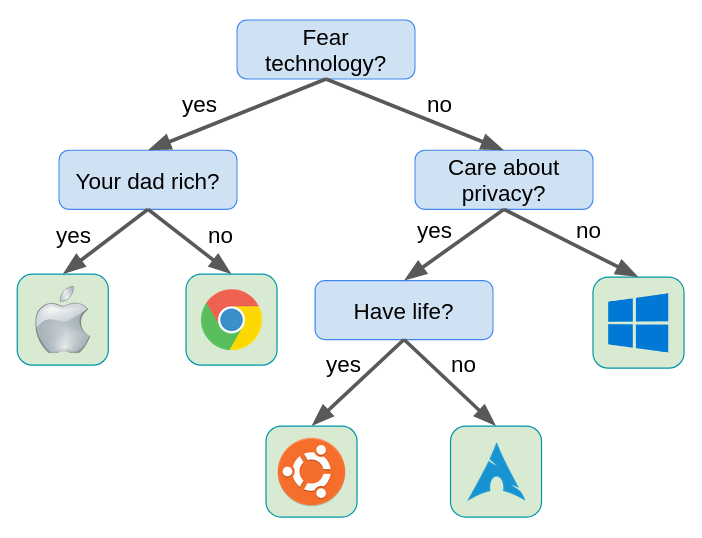

Pada gambar diatas merupakan contoh binary tree, karena tiap nodenya akan memiliki dua cabang. Gambar tersebut memang tidak terlihat jelas merupakan sebuah struktur tree, karena itu merupakan struktur tree yang terbalik.

* Root Node : root akan menempati posisi paling atas, pada gambar diatas terdapat _Fear Technology_
* Lear Node : leaf berupa sejumlah node yang posisinya di ujung bawah, pada gambar diatas terdapat 5 buah leaf yaitu komponen-komponen yang dalam kotak
* Internal Node : internal berupa sejumlah node yang berada diantara root dan leaf, pada gambar diatas terdapat 3 node.

Terdapat beberapa decision tree algorithm atau algoritma decision tree dan kita akan mempelajari Classification And Regression Tree (CART) yang merupakan default algorithm yang diterapkan oleh scikit learn sebagai implementasi decision tree. Selain CART terdapat beberapa algorithm yang cukup umum digunakan yaitu _ID3_, _C4.5_, _C5.0_

### Gini Impurity

Gini Impurity merupakan impurity measure yang diterapkan pada algorithma chart. Gini Impurity memiliki jangkauan nilai antara nol dan satu, dimana nilai nol mengindikasikan nilai murni yang sempurna sedangkan nilai satu mengindikasikan nilai paling impure atau paling tidak murni.

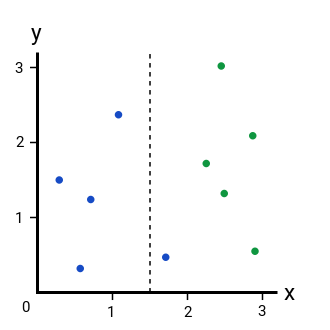

Pada gambar diatas terdapat 10 data points yang terbagi dalam dua class yaitu class biru dan class hijau. Selanjutnya kita pisahkan datanya ke dalam dua bagian sehingga dihasilkan dua buah ruas, sebut saja ruas kiri dan ruas kanan. Garis putus-putus tersebut berperan sebagai splitter atau pemisah. Berikutnya kita akan lakukan pengukuran impurity pada kedua ruas tersebut

#### Ruas Kiri:
$
\begin{align*} 
G &amp;= 1 - \sum_i^n P_i^2 \\
  &amp;= 1 - P(biru)^2 \\
  &amp;= 1 - (\frac{4}{4})^2 = 0
\end{align*}
$

#### Ruas Kanan:
$
\begin{align*}
G &amp;= 1 - \sum_i^n P_i^2 \\
  &amp;= 1 - (P(biru)^2 + P(hijau)^2)\\
  &amp;= 1 - ( (\frac{1}{6})^2 + (\frac{5}{6})^2 ) = 0.278
\end{align*}
$

#### Average Gini Impurity:

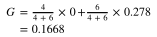

In [1]:
from IPython.display import SVG
SVG("./math.svg")

### Information Gain

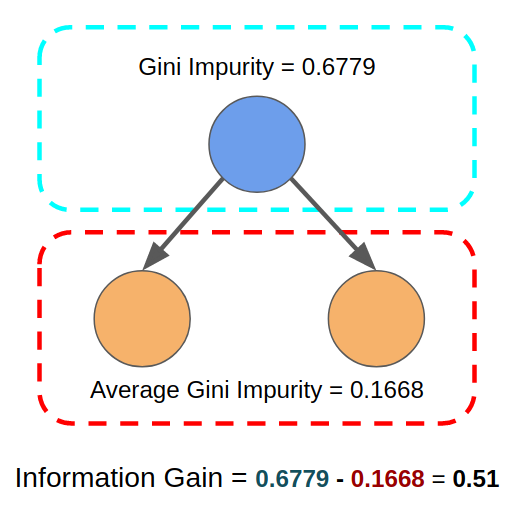

Information Gain bisa diperoleh dengan menselisihkan nilai Gini Impurity sebelum proses splitting dengan nilai rata-rata Gini Impurity setelah proses splitting dan hasilnya adalah 0.51

### Membangun Decision Tree

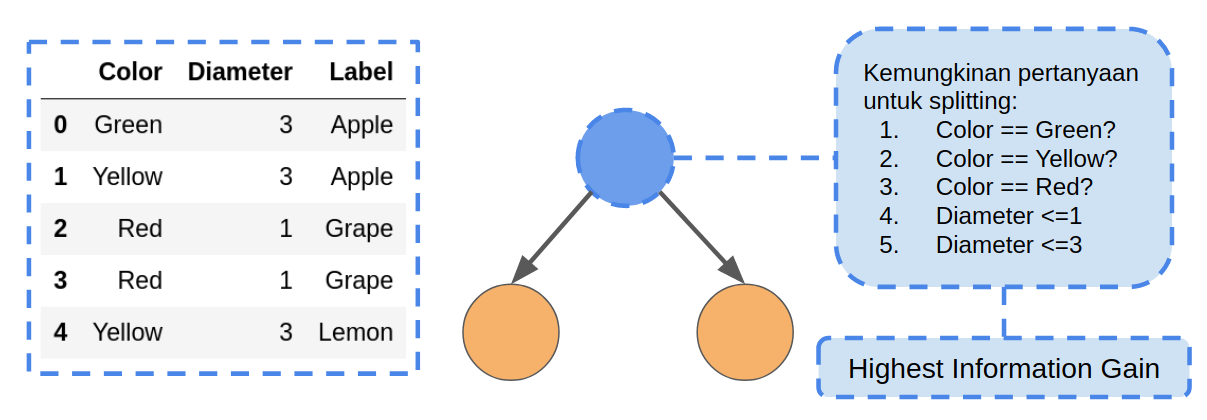

Pada gambar diatas Color dan Diamter berperan sebagai features dan Label berperan sebagai target. Dari dataset ini akan dibentuk sebuah decision tree, disini juga terdapat daftar pertanyaan yang dapat digunakan untuk melakukan proses splitting. Dan cara untuk memilih pertanyaan dari semua pertanyaan adalah dengan menggunakan Information Gain.

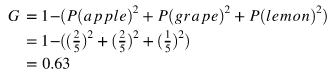

In [2]:
1 - ( (2/5)**2 + (2/5)**2 + (1/5)**2 )

0.6399999999999999

In [3]:
import pandas as pd

training_data = [
    ['Green', 3, 'Apple'],
    ['Yellow', 3, 'Apple'],
    ['Red', 1, 'Grape'],
    ['Red', 1, 'Grape'],
    ['Yellow', 3, 'Lemon'],
]

# Column labels.
# These are used only to print the tree.
header = ["Color", "Diameter", "Label"]

pd.DataFrame(training_data, columns=header)

,Color,Diameter,Label
0,Green,3,Apple
1,Yellow,3,Apple
2,Red,1,Grape
3,Red,1,Grape
4,Yellow,3,Lemon


## Dataset
Referensi: https://en.wikipedia.org/wiki/Iris_flower_data_set

In [4]:
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)

print(f'Dimensi Feature: {X.shape}')
print(f'Class: {set(y)}')

Dimensi Feature: (150, 4)
Class: {0, 1, 2}


Pada output diatas dapat dilihat bahwa dimensi data dari feature nya adalah (150, 4) yang berarti disini terdapat 150 baris dan 4 kolom, lalu terkait dengan class pada target labelnya diatas terdapat 3 buah class yaitu (0, 1, 2). Selanjutnya kita akan bagi dataset ini kedalam training dan testing set.

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=0)

## Classification dengan DecisionTreeClassifier 

In [6]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=4)

model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

## Visualisasi Model

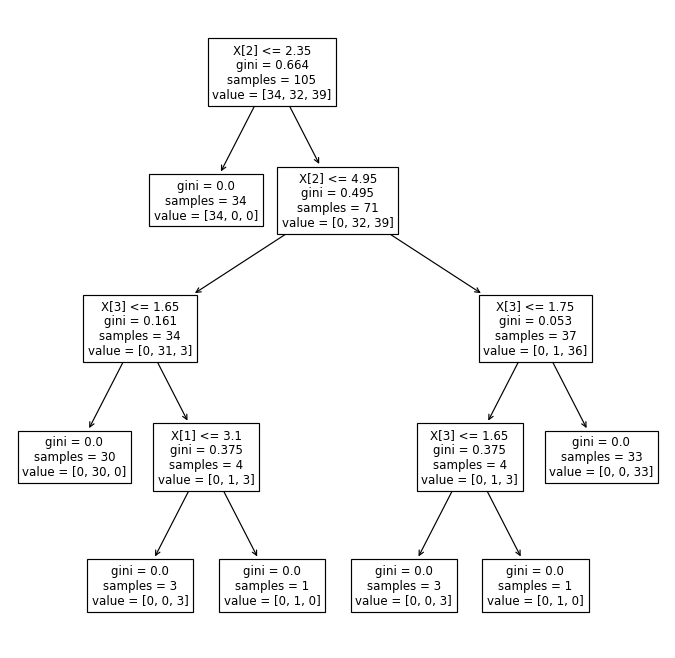

In [7]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.rcParams['figure.dpi'] = 85
plt.subplots(figsize=(10, 10))
tree.plot_tree(model, fontsize=10)
plt.show()

Setiap nodesnya terdapat beberapa informasi :

* Baris pertama : kriteria splitting (memanfaatkan features index ketiga dan syarat/kriterianya adalah apakah nilainya lebih kecil sama dengan (nilai))
* Baris kedua : gini impurity
* Baris ketiga : keterangan samples (jumlah data)
* Baris keempat : value (kelas index 1,index 2, index 3)

## Evaluasi Model

In [8]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

